# Seleção de atributos

- Análise dos atributos escolhidos utilizando Random Forests.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from regression_utils import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [2]:
NORMALIZE = False
ESTIMATORS = 100

In [3]:
summary_df = pd.DataFrame({"paredoes_decisivos": [0]*len(COLUMNS), "importancia_acumulada": [0]*len(COLUMNS)}, index=COLUMNS, columns=["paredoes_decisivos", "importancia_acumulada"])

In [4]:
summary_df.drop(index=["paredao", "nome", "rejeicao"], inplace=True)

# Análise de importância de parâmetros

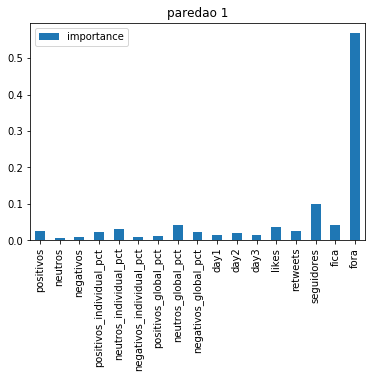

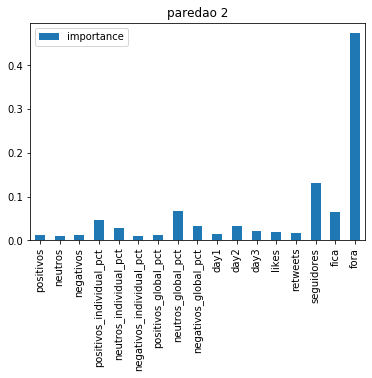

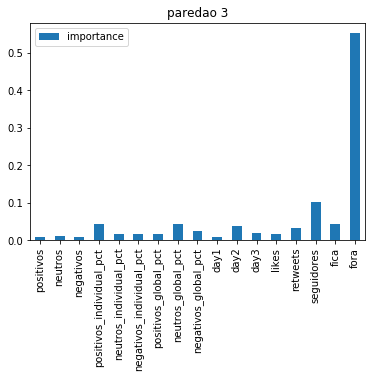

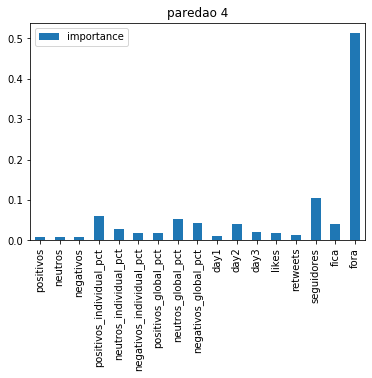

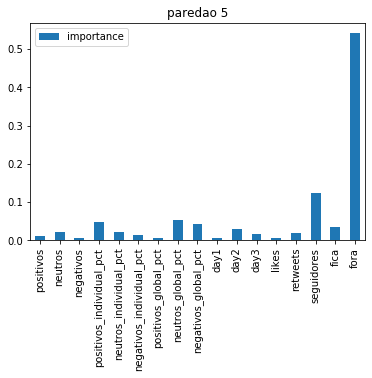

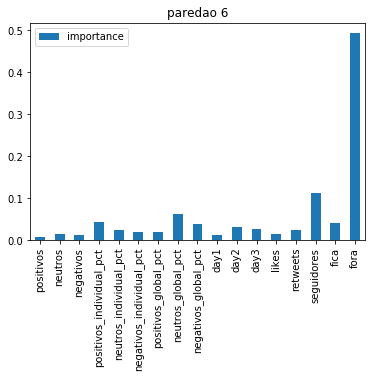

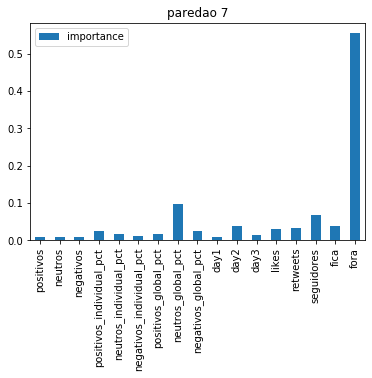

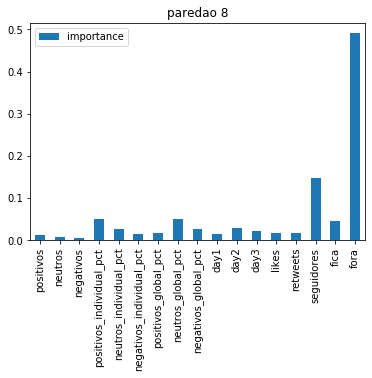

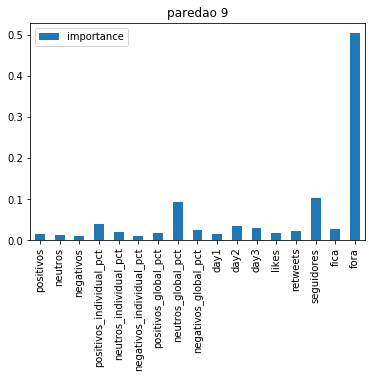

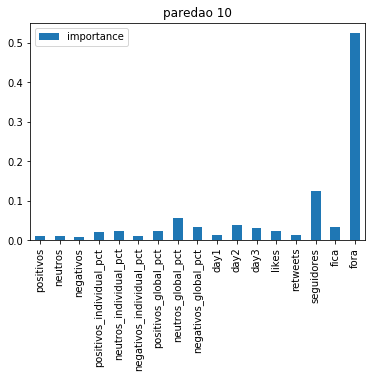

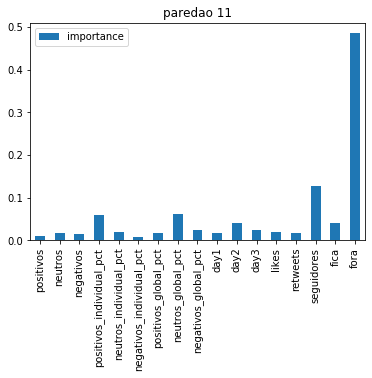

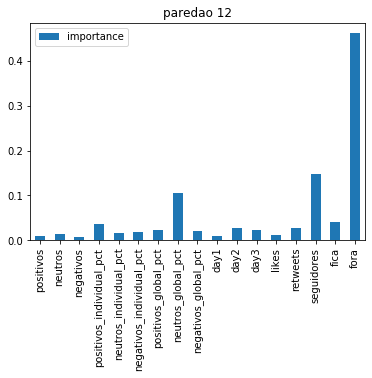

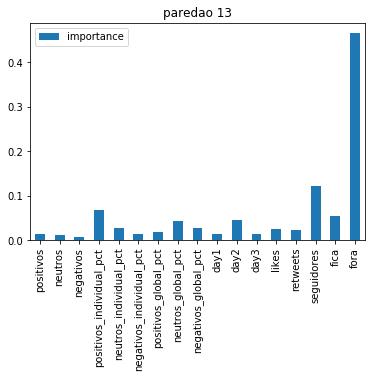

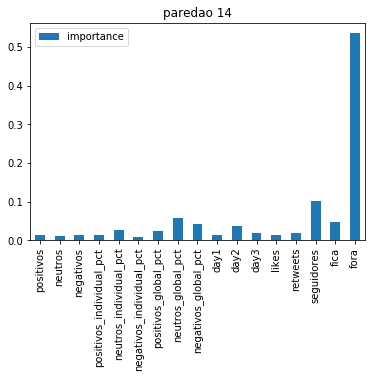

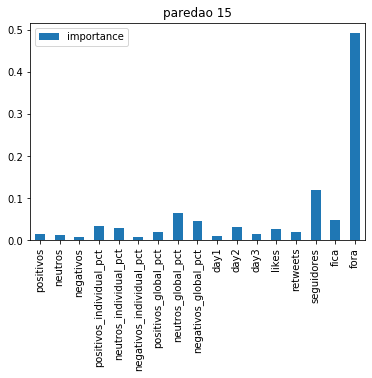

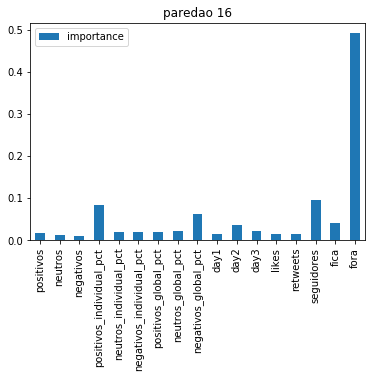

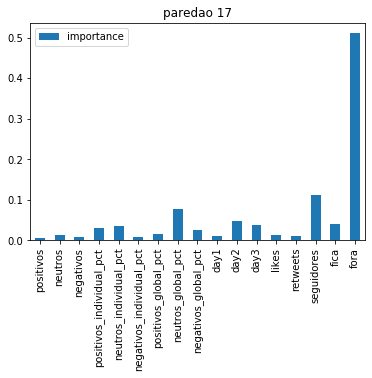

In [5]:
for i in range(1, 18):
    train_df, test_df = get_train_test(i, normalize=NORMALIZE)
    x_train, y_train = train_df.drop(columns=["paredao", "nome", "rejeicao"], axis=1).to_numpy(), train_df.drop(columns=train_df.columns[:-1], axis=1).to_numpy()
    x_test, y_test = test_df.drop(columns=["paredao", "nome", "rejeicao"], axis=1).to_numpy(), test_df.drop(columns=train_df.columns[:-1], axis=1).to_numpy()

    regressor = SelectFromModel(RandomForestRegressor(n_estimators=ESTIMATORS))
    _ = regressor.fit(x_train, y_train)
    
    features = regressor.get_support()
    columns = train_df.drop(columns=["paredao", "nome", "rejeicao"]).columns
    indexes = columns[features]
    features_importance = regressor.estimator_.feature_importances_

    summary_df["paredoes_decisivos"].loc[indexes] += 1
    summary_df["importancia_acumulada"] += features_importance

    pd.DataFrame(features_importance, index=columns, columns=["importance"]).plot.bar(title=f"paredao {i}")


# Sumarizando

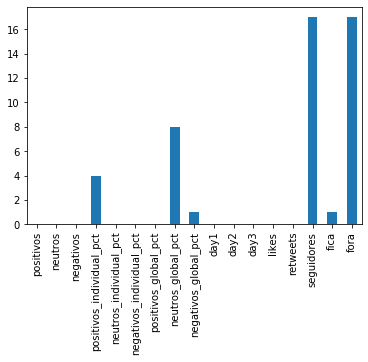

In [6]:
summary_df["paredoes_decisivos"].plot.bar()

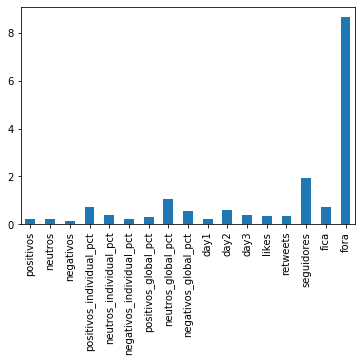

In [7]:
summary_df["importancia_acumulada"].plot.bar()


In [8]:
summary_df.sort_values(by="importancia_acumulada", ascending=False)

,paredoes_decisivos,importancia_acumulada
fora,17,8.657844
seguidores,17,1.939599
neutros_global_pct,8,1.051335
fica,1,0.724637
positivos_individual_pct,4,0.721740
day2,0,0.601163
negativos_global_pct,1,0.562281
neutros_individual_pct,0,0.408329
day3,0,0.370811
retweets,0,0.350130


# Análise de paredões em conjunto

In [9]:
data_df = train_df.append(test_df, ignore_index=True)
x_train, y_train = data_df.drop(columns=["paredao", "nome", "rejeicao"], axis=1).to_numpy(), data_df.drop(columns=train_df.columns[:-1], axis=1).to_numpy()
regressor = SelectFromModel(RandomForestRegressor(n_estimators=ESTIMATORS))
_ = regressor.fit(x_train, y_train)




In [10]:
features = regressor.get_support()
columns = train_df.drop(columns=["paredao", "nome", "rejeicao"]).columns
indexes = columns[features]
features_importance = regressor.estimator_.feature_importances_

summary_df["importancia_acumulada"] = features_importance

In [11]:
summary_df.sort_values(by="importancia_acumulada", ascending=False)

,paredoes_decisivos,importancia_acumulada
fora,17,0.528571
seguidores,17,0.123504
neutros_global_pct,8,0.060277
fica,1,0.036967
positivos_individual_pct,4,0.036085
retweets,0,0.029083
day2,0,0.027232
negativos_global_pct,1,0.024877
day3,0,0.024354
neutros_individual_pct,0,0.023504


# Análise de correlação

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [13]:
data_df = train_df.append(test_df, ignore_index=True)

In [14]:
cor = data_df.corr()

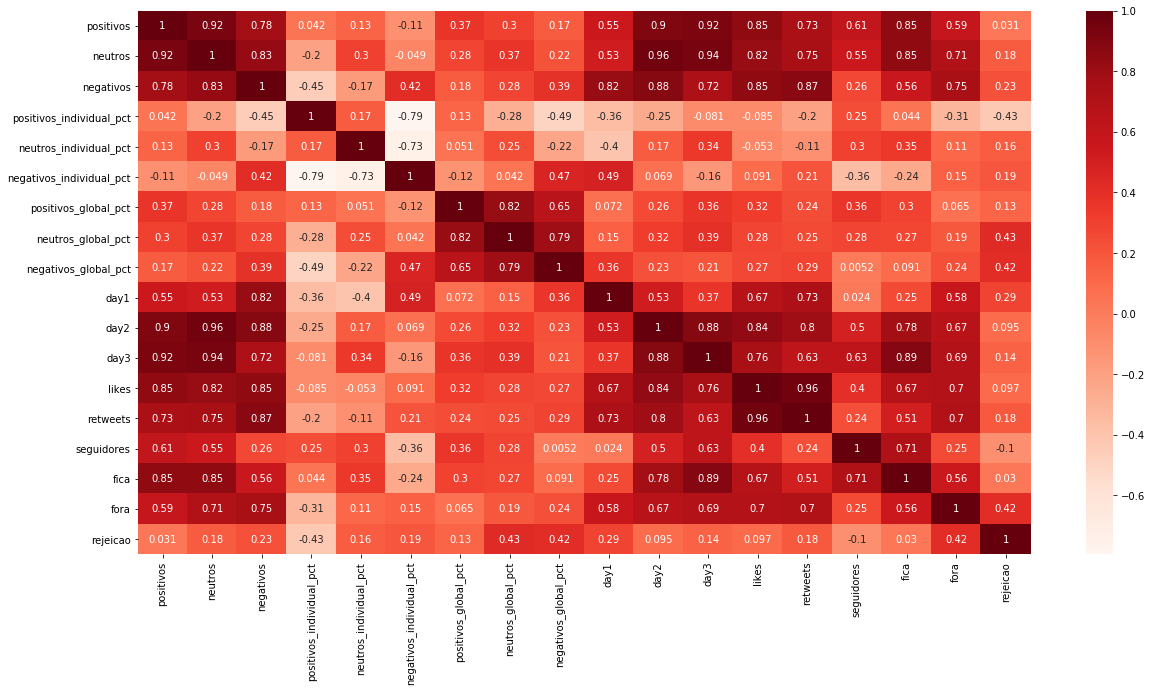

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

- Ordenando por correlação

In [16]:
cor_target = abs(cor["rejeicao"])

In [17]:
cor_target.sort_values(ascending=False)

rejeicao                    1.000000
neutros_global_pct          0.431215
positivos_individual_pct    0.428733
negativos_global_pct        0.417141
fora                        0.417003
day1                        0.289279
negativos                   0.227234
negativos_individual_pct    0.194812
retweets                    0.182523
neutros                     0.176117
neutros_individual_pct      0.162825
day3                        0.139718
positivos_global_pct        0.126399
seguidores                  0.104207
likes                       0.096679
day2                        0.094896
positivos                   0.031029
fica                        0.030074
Name: rejeicao, dtype: float64

- Filtrando por correlação superior a 0.5

In [18]:
relevant_features = cor_target[cor_target > 0.5]

In [19]:
relevant_features

rejeicao    1.0
Name: rejeicao, dtype: float64

- Correlação ao atributo alvo (rejeicao) de todos os atributos

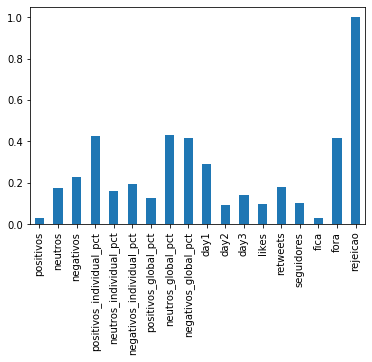

In [20]:
cor_target.plot.bar()

# Combinando os resultados

In [32]:
summary_df["corr"] = [cor_target[index] for index in summary_df.index]
summary_df.drop("paredoes_decisivos", axis=1, inplace=True)

In [41]:
summary_df.sort_values(by=["importancia_acumulada", "corr"], ascending=False)

,importancia_acumulada,corr
fora,0.528571,0.417003
seguidores,0.123504,0.104207
neutros_global_pct,0.060277,0.431215
fica,0.036967,0.030074
positivos_individual_pct,0.036085,0.428733
retweets,0.029083,0.182523
day2,0.027232,0.094896
negativos_global_pct,0.024877,0.417141
day3,0.024354,0.139718
neutros_individual_pct,0.023504,0.162825
